# Preliminary Data Collection

Data is plentiful on Reddit, but before we can start collecting, we'll need to install a few libraries that would allow us to collect it.

The main gist of collection is:

1. Scrape data off [Reddit](https://reddit.com) using `praw`
2. Store all that data, somewhere, perhaps on a MySQL database, somewhere.

In [20]:
!pip install praw
!pip install mysql-connector
!pip install pytz

We'll be storing on a server somewhere. Since we're not provided one, I do have one and have set it up for this occasion.

> Server IP: `sql181.main-hosting.eu` (`46.17.175.1`)   
> Server Port: `3306`  
> Database Name: `u606982933_red1`, `u606982933_red2`, `u606982933_red3`  
> Server Username: `u606982933_red1`, `u606982933_red2`, `u606982933_red3`  
> Server Password: `F4nd0m5.C0nnec7`  

Note that each database has its own username and a 1GB file size limit.

In [7]:
import praw
import mysql.connector

First, let's query the databases to see if they're online.

In [10]:
mysql_serverip = "sql181.main-hosting.eu"
mysql_serverport = 3306
mysql_dbname = ["u606982933_red1", "u606982933_red2", "u606982933_red3"]
mysql_username = ["u606982933_red1", "u606982933_red2", "u606982933_red3"]
mysql_password = "F4nd0m5.C0nnec7"
mysql_connection = []
mysql_cursor = []

for dbname, dbuser in zip(mysql_dbname, mysql_username):
    new_mysql_connection = mysql.connector.connect(host = mysql_serverip, user = dbuser, passwd = mysql_password)
    mysql_connection.append(new_mysql_connection)
    new_mysql_connection_cursor = new_mysql_connection.cursor()
    mysql_cursor.append(new_mysql_connection_cursor)
    
for connection, cursor in zip(mysql_connection, mysql_cursor):
    print(connection)
    print(cursor)

MySQLCursor: (Nothing executed yet)
MySQLCursor: (Nothing executed yet)
MySQLCursor: (Nothing executed yet)


And now, login to Reddit.

> App ID: `0lKXI8oYAYGUKg` (AKA. Client ID)  
> App Secret: `ptTp7vRNPVXQ0WIZwfcuAItUEcI` (AKA. Client Secret)

In [11]:
reddit_appid = "0lKXI8oYAYGUKg"
reddit_secret = "ptTp7vRNPVXQ0WIZwfcuAItUEcI"

reddit = praw.Reddit(client_id = reddit_appid, client_secret = reddit_secret, user_agent = "PRAW 6.3.1")
print(reddit)

And now, we can start collecting our data. Let's start with myself ([/u/aytimothy](https://reddit.com/u/aytimothy)) and then branch out from there based on the other people who have participated in.

In [23]:
reddit_myself = reddit.redditor("aytimothy")

print("Comment Karma: " + str(reddit_myself.comment_karma))
print("Created: " + str(reddit_myself.created_utc))
print("Verified Email: " + str())
print("Icon: " + str(reddit_myself.icon_img))
print("ID: " + str(reddit_myself.id))
print("Premium: " + str(reddit_myself.is_gold))
print("Name: " + str(reddit_myself.name))
print("Link Karma: " + str(reddit_myself.link_karma))

Comment Karma: 4600
Created: 1397299382.0
Verified Email: 
Icon: https://www.redditstatic.com/avatars/avatar_default_12_7E53C1.png
ID: g3cbj
Premium: True
Name: aytimothy
Link Karma: 4941


In [33]:
aytimothy = reddit_myself
aytimothy_submissions = aytimothy.submissions.new()
aytimothy_comments = aytimothy.comments.new()

for submission in aytimothy_submissions:
    print("ID: " + str(submission))
    print("Subreddit: " + str(submission.subreddit))
    print("Is Text: " + str(submission.is_self))
    print("Upvotes: " + str(submission.score))
    print("Name: " + str(submission.title))
    print("Comments: " + str(submission.num_comments))
    print("")
print("-----")
for comment in aytimothy_comments:
    print("ID: " + str(comment))
    print("Subreddit: " + str(comment.subreddit))
    print("Timestamp: " + str(comment.created_utc))
    print("Upvotes: " + str(comment.score))
    print("Body: " + str(comment.body))
    print("")

ID: cep1a8
Subreddit: giftcardexchange
Is Text: True
Upvotes: 1
Name: [H] Westfield Gift Card $470 AUD [W] Offer: PayPal, Cash (in-person)
Comments: 5

ID: cdch5t
Subreddit: giftcardexchange
Is Text: True
Upvotes: 0
Name: [H] $470 Westfield Gift Card [W] Offer (only Cash, PayPal or Bank Transfer, must collect in person)
Comments: 4

ID: c78dh2
Subreddit: digimon
Is Text: False
Upvotes: 7
Name: [OC] Veemon, in AR
Comments: 5

ID: bvkzqf
Subreddit: JimSterling
Is Text: False
Upvotes: 82
Name: Interlopers shots: Chara vs Jim Sterling (Yes, he's a character in this)
Comments: 11

ID: 9yqdgf
Subreddit: Medabot
Is Text: False
Upvotes: 52
Name: I can't believe you guys haven't done this yet...
Comments: 2

ID: 8ygek9
Subreddit: DigimonReArise
Is Text: False
Upvotes: 4
Name: ShineGreymon Gatcha Notice Translated
Comments: 3

ID: 8x6wf6
Subreddit: DigimonReArise
Is Text: False
Upvotes: 3
Name: I'm looking for data regarding drop rates and stuffs. Please help out.
Comments: 2

ID: 8wqnsn
Subredd

ID: evhry6v
Subreddit: GoldCoast
Timestamp: 1564531246.0
Upvotes: 1
Body: Eh? I thought they sold it to you on the spot? At least the ones in the booths?

ID: evf2659
Subreddit: BattleNetwork
Timestamp: 1564486496.0
Upvotes: 1
Body: Oh, and I realized I'm such a dummy and I totally wrote the wrong game name, and I was totally very badly trying to refer to the Tri Wings in EndCycle VS. Oops. Don't mind my brain fart.

The question should've been:

> Um.. What happened to the Tri Wing(s) in EndCycle VS? I can't seem to find it anywhere..

ID: eveuizz
Subreddit: BattleNetwork
Timestamp: 1564479420.0
Upvotes: 1
Body: Oh no, I just don't know what the characters we play as in Tri Wing are called.. I must have recalled it wrong from the reveal trailer.

ID: eveewum
Subreddit: GoldCoast
Timestamp: 1564464648.0
Upvotes: 6
Body: Have you tried the theme park re-sellers along Surfers' Paradise? They sell discounted tickets. I know there's deals elsewhere, especially off-season (ie. in the middle

And then repeat for every user who has commented on my submissions, and their submissions, and so on. Look in the `/collection` folder.

Connected to database successfully. :)


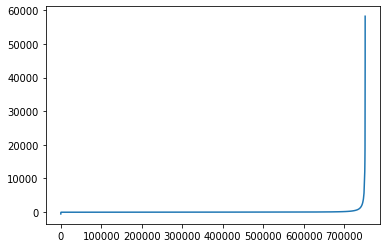

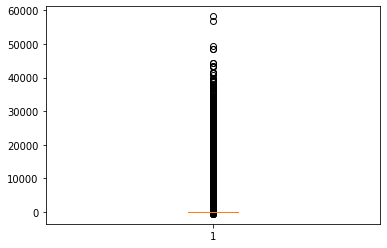

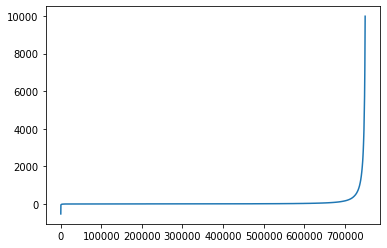

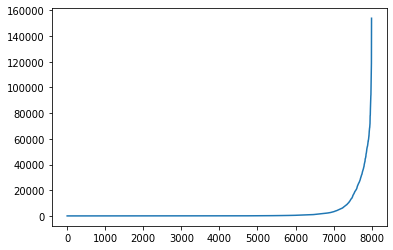

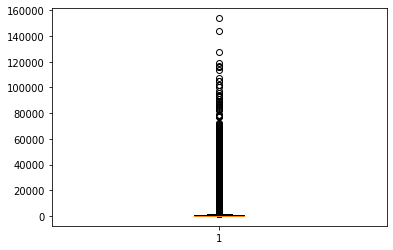

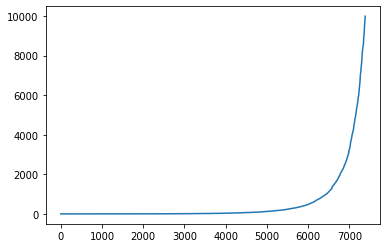

In [3]:
import mysql.connector
import numpy as np
import matplotlib.pyplot as plt

mysql_address = "sql181.main-hosting.eu"
mysql_port = 3306
mysql_dbname = "u606982933_red1"
mysql_username = "u606982933_red1"
mysql_password = "F4nd0m5.C0nnec7"

db_conn = mysql.connector.connect(host = mysql_address, user = mysql_username, passwd = mysql_password, database = mysql_dbname)
db_cursor = None
if (db_conn is None):
	output("Could not connect to the database >:( \nAborting!")
else:
    db_cursor = db_conn.cursor()
    print("Connected to database successfully. :)")
    
db_cursor.execute("SELECT Score FROM `Comments` ORDER BY Score ASC")
raw_results = db_cursor.fetchall()
results = [result[0] for result in raw_results]
plt.plot(results)
plt.show()

plt.boxplot(results)
plt.show()

db_cursor.execute("SELECT Score FROM `Comments` WHERE Score < 10000 ORDER BY Score ASC")
raw_results = db_cursor.fetchall()
results = [result[0] for result in raw_results]
plt.plot(results)
plt.show()

db_cursor.execute("SELECT Score FROM `Submissions` ORDER BY Score ASC")
raw_results = db_cursor.fetchall()
results = [result[0] for result in raw_results]
plt.plot(results)
plt.show()

plt.boxplot(results)
plt.show()

db_cursor.execute("SELECT Score FROM `Submissions` WHERE SCore < 10000 ORDER BY Score ASC")
raw_results = db_cursor.fetchall()
results = [result[0] for result in raw_results]
plt.plot(results)
plt.show()